# Visualize Differences Across Cell Lines

**Gregory Way, 2019**

Visualize mean square error per feature for each cell line independently.

Also shown are F statistics, which calculates the ratio of between group variance / within group variance.

Therefore, we can interpret high F statistic values as cell health features with large differences in performance across cell lines while low values indicate features that are consistent across cell lines.

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
set.seed(123)

In [3]:
cell_lines <- c("A549", "ES2", "HCC44")

## Load Label Data

In [4]:
# Annotated Cell Health Features
feat_file <- file.path("..", "1.generate-profiles", "data", "labels", "feature_mapping_annotated.csv")
label_df <- readr::read_csv(feat_file, col_types = readr::cols())

head(label_df)

original_name,updated_name,feature_type,measurement,maria_thumbs_up,assay,description
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
Row,well_row,metadata,NA,NA,NA,NA
Column,well_col,metadata,NA,NA,NA,NA
Plate Name,plate_name,metadata,NA,NA,NA,NA
sgRNA,guide,metadata,NA,NA,NA,NA
Inf %,cc_infection_percentage,metadata,NA,NA,crispr_efficiency,NA
% Inf,vb_infection_percentage,metadata,NA,NA,crispr_efficiency,NA


## Load Reconstruction Errors

In [5]:
regression_file <- file.path("results", "full_cell_health_regression_results.tsv.gz")
regression_metrics_df <- readr::read_tsv(regression_file, col_types = readr::cols()) %>%
    dplyr::filter(cell_line %in% cell_lines)
    
head(regression_metrics_df)

value,metric,target,data_fit,shuffle,y_transform,cell_line
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0.6593006,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,ES2
1.0140771,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,ES2
0.6722728,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,HCC44
0.8727914,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,HCC44
0.6651626,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,A549
0.1606471,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,A549


## Process Data for Visualization

## Visualize

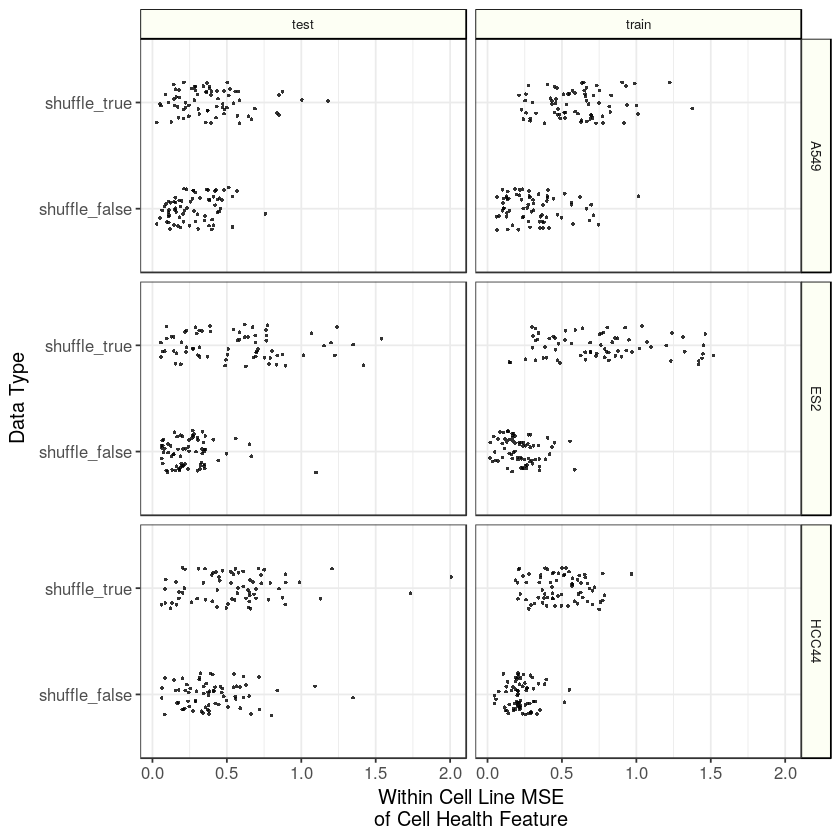

In [6]:
ggplot(regression_metrics_df %>% dplyr::filter(metric == "mse"),
       aes(x = shuffle,
           y = value)) +
    geom_jitter(width = 0.2, size = 0.7, alpha = 0.8, pch = 16) +
    facet_grid(cell_line~data_fit) +
    xlab("Data Type") +
    ylab("Within Cell Line MSE\nof Cell Health Feature") +
    coord_flip() +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path("figures", "cell_line_mse_differences.png")
ggsave(output_file, height = 5, width = 5, dpi = 500)

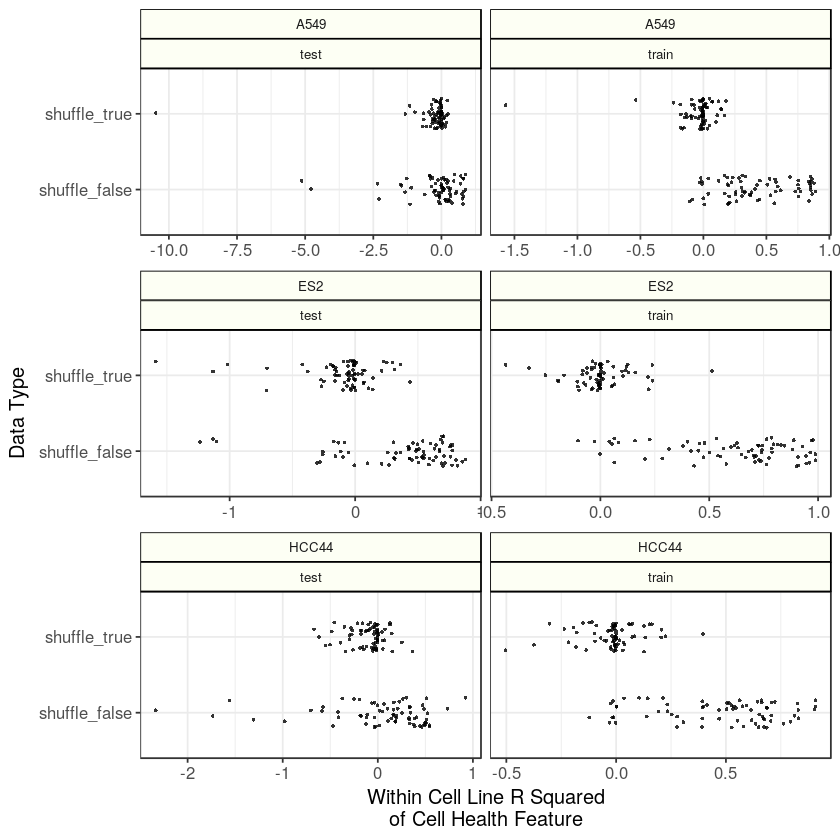

In [7]:
ggplot(regression_metrics_df %>% dplyr::filter(metric == "r_two"),
       aes(x = shuffle,
           y = value)) +
    geom_jitter(width = 0.2, size = 0.7, alpha = 0.8, pch = 16) +
    facet_wrap(cell_line~data_fit, ncol = 2, scales = "free_x") +
    xlab("Data Type") +
    ylab("Within Cell Line R Squared\nof Cell Health Feature") +
    coord_flip() +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path("figures", "cell_line_rsquared_differences.png")
ggsave(output_file, height = 5, width = 5, dpi = 500)

In [8]:
# Compile Results
results_df <- regression_metrics_df %>%
    dplyr::left_join(label_df, by = c("target" = "updated_name")) %>%
    dplyr::mutate(plot_group = paste(metric, target, shuffle))

dim(results_df)
head(results_df, 2)

[1] 1680   14

value,metric,target,data_fit,shuffle,y_transform,cell_line,original_name,feature_type,measurement,maria_thumbs_up,assay,description,plot_group
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
0.6593006,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true
1.0140771,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true


In [9]:
# Set some plotting defaults
measurement_colors <- c(
    "apoptosis" = "#a6cee3",
    "cell_cycle_arrest" = "#1f78b4",
    "cell_viability" = "#b2df8a",
    "death" = "#33a02c",
    "dna_damage" = "#fb9a99", 
    "g1_arrest" = "#fdbf6f",
    "g2_arrest" = "#ff7f00",
    "g2_m_arrest" = "#005c8c",
    "mitosis" = "green",
    "other" = "black",
    "s_arrest" = "#cab2d6",
    "toxicity" = "#6a3d9a"
)

measurement_labels <- c(
    "apoptosis" = "Apoptosis",
    "cell_cycle_arrest" = "Cell Cycle Arrest",
    "cell_viability" = "Cell Viability",
    "death" = "Death",
    "dna_damage" = "DNA Damage", 
    "g1_arrest" = "G1 Arrest",
    "g2_arrest" = "G2 Arrest",
    "g2_m_arrest" = "G2/M Arrest",
    "mitosis" = "Mitosis",
    "other" = "Other",
    "s_arrest" = "S Arrest",
    "toxicity" = "Toxicity"
)

dye_colors <- c(
    "hoechst" = "#639B94",
    "edu" = "#E45242",
    "gh2ax" = "#E2C552",
    "ph3" = "#7B9C32",
    "hoechst_gh2ax" = "#535f52",
    "hoechst_edu" = "#73414b",
    "edu_gh2ax" = "#e37a48",
    "caspase" = "#F7B1C1",
    "draq" = "#FF6699",
    "draq_caspase" = "#7f4a72",
    "many_cell_cycle" = "#E9DFC3",
    "crispr_efficiency" = "black"
)

dye_labels <- c(
    "hoechst" = "Hoechst",
    "edu" = "EdU",
    "gh2ax" = "gH2AX",
    "ph3" = "pH3",
    "hoechst_gh2ax" = "Hoechst + gH2AX",
    "hoechst_edu" = "Hoechst + EdU",
    "edu_gh2ax" = "EdU + gH2AX",
    "caspase" = "Caspase 3/7",
    "draq" = "DRAQ7",
    "draq_caspase" = "DRAQ7 + Caspase 3/7",
    "many_cell_cycle" = "Cell Cycle (Many Dyes)",
    "crispr_efficiency" = "CRISPR Efficiency"
)

In [10]:
head(results_df, 2)

value,metric,target,data_fit,shuffle,y_transform,cell_line,original_name,feature_type,measurement,maria_thumbs_up,assay,description,plot_group
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
0.6593006,mse,cc_all_high_n_spots_h2ax_mean,train,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true
1.0140771,mse,cc_all_high_n_spots_h2ax_mean,test,shuffle_true,raw,ES2,ALL - High number of spots gH2AX - Mean per Well,cell_cycle,dna_damage,0,gh2ax,Within all cells: fraction of cells containing more than 3 gH2AX spots,mse cc_all_high_n_spots_h2ax_mean shuffle_true


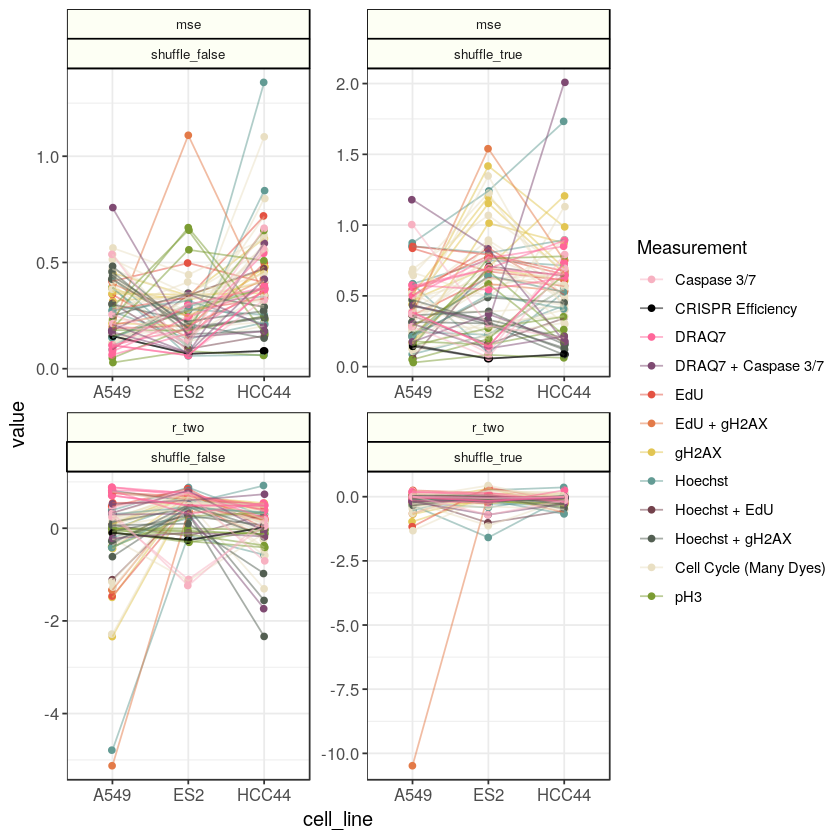

In [11]:
ggplot(results_df %>%
       dplyr::filter(data_fit == "test"),
       aes(x = cell_line,
           y = value,
           group = plot_group)) +
    geom_jitter(aes(color = assay), width = 0.01) +
    geom_line(aes(color = assay),
              alpha = 0.5) +
    scale_color_manual(name = "Measurement",
                       values = dye_colors,
                       labels = dye_labels) +
    facet_wrap(metric~shuffle, scales = "free") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path("figures", "cell_line_differences_target_linked_full.png")
ggsave(output_file, height = 5, width = 5, dpi = 500)

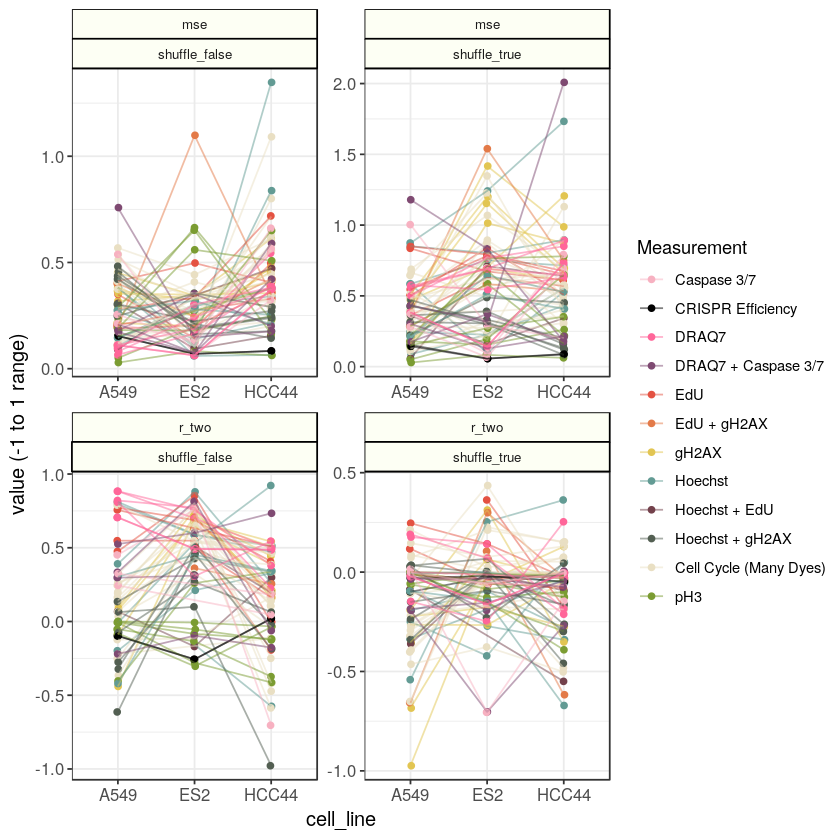

In [12]:
ggplot(results_df %>%
       dplyr::filter(data_fit == "test",
                     value > -1),
       aes(x = cell_line,
           y = value,
           group = plot_group)) +
    geom_jitter(aes(color = assay), width = 0.01) +
    geom_line(aes(color = assay),
              alpha = 0.5) +
    ylab("value (-1 to 1 range)") +
    scale_color_manual(name = "Measurement",
                       values = dye_colors,
                       labels = dye_labels) +
    facet_wrap(metric~shuffle, scales = "free") +
    theme_bw() +
    theme(axis.text = element_text(size = 10),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 8),
          strip.background = element_rect(colour = "black",
                                          fill = "#fdfff4"))

output_file <- file.path("figures", "cell_line_differences_target_linked_subset.png")
ggsave(output_file, height = 5, width = 5, dpi = 500)